# Assignment 1
# Ananya Singh
 E036
 E1 
 BTECH CE E

In [1]:
import numpy as np 
import pandas as pd
data=pd.read_csv('customer_data.csv')
import matplotlib.pyplot as plt

In [2]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(data.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Here we can see that the data is clean and does not have any missing values so 
the result that we will get will not be affected by data discripancy

In [28]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Gender']=lb.fit_transform(data['Gender'].astype('str'))
print(data['Gender'])

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32


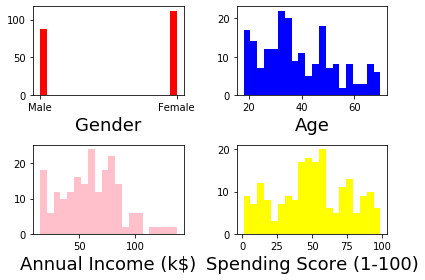

In [4]:
X= data['Gender']
X1= data['Age']
X2=data['Annual Income (k$)']
Y=data['Spending Score (1-100)']
plt.subplot(2,2,1)
plt.hist(X,bins=20, color='r')
plt.xlabel('Gender', fontsize =18)
plt.subplot(2,2,2)
plt.hist(X1,bins=20, color='b')
plt.xlabel('Age', fontsize =18)
plt.subplot(2,2,3)
plt.hist(X2,bins=20, color='pink')
plt.xlabel('Annual Income (k$)', fontsize =18)
plt.subplot(2,2,4)
plt.hist(Y,bins=20, color='yellow')
plt.xlabel('Spending Score (1-100)', fontsize =18)
plt.tight_layout()





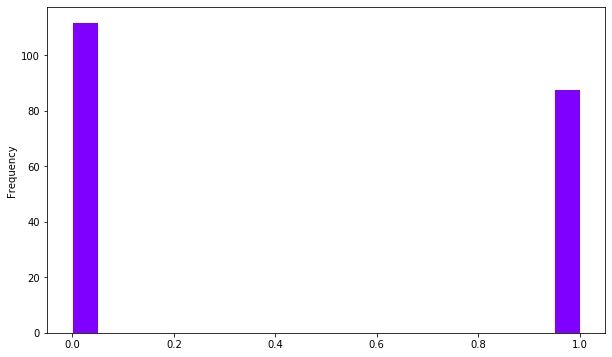

In [29]:
(data['Gender']).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white', cmap='rainbow')


 We can see that in the database we have more females and than males through histogram

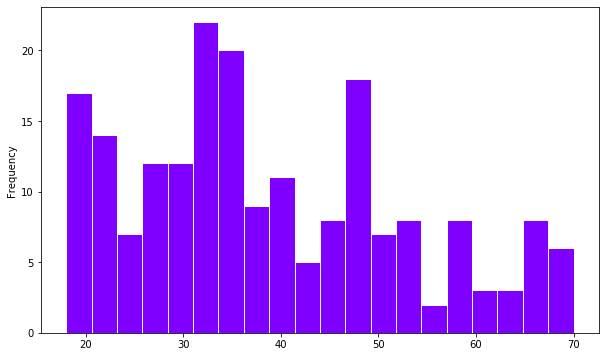

In [5]:
(data['Age']).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white', cmap='rainbow')


We can also see that a lot of people of mid thirties in the dataset through histogram

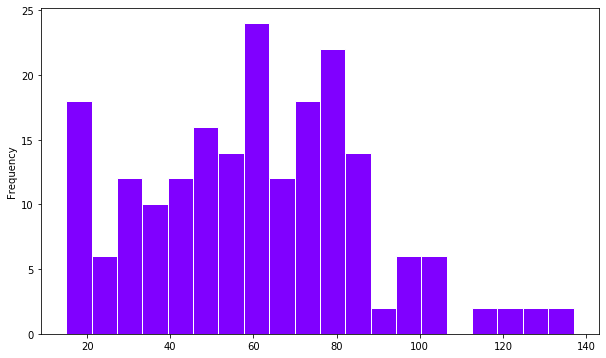

In [6]:
(data['Annual Income (k$)']).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white', cmap='rainbow')


 We can see that the highest number of people have their income just above 50k $

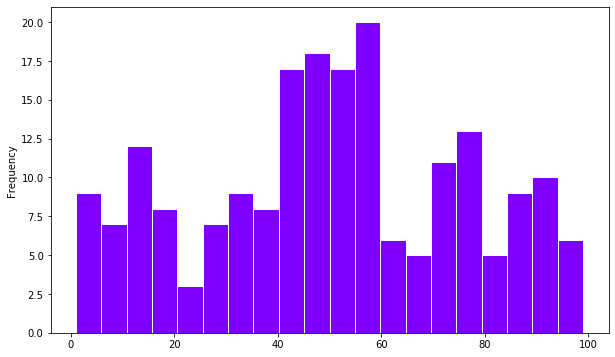

In [30]:
(data['Spending Score (1-100)']).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white', cmap='rainbow')


 we can also see that the spending score has high frequency around 50 score

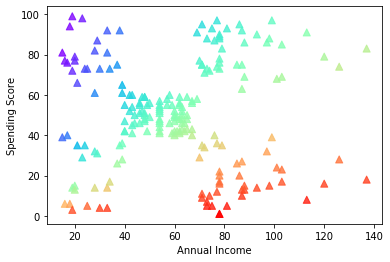

In [7]:
plt.scatter(X2,Y, c=np.arctan2(X2, Y), cmap='rainbow', s=50, alpha=0.8, marker='^')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


Here we can see that easily 5 clusters can be made of :
1. Low income group and low spending score
2. Low income and high spending score
3. Mid income group and mid spending score
4. High income and low Spending Score
5. High income and High spending score

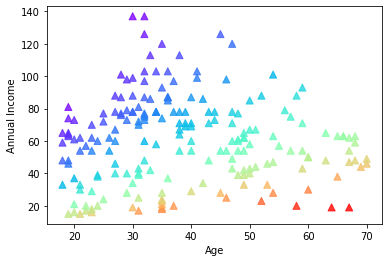

In [8]:
plt.scatter(X1,X2, c=np.arctan2(X1, X2), cmap='rainbow', s=50, alpha=0.8, marker='^')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()


 Here we can see that we cannot easily make out clusters by just looking at scatter plot that is why we need clustering methods to help us with that

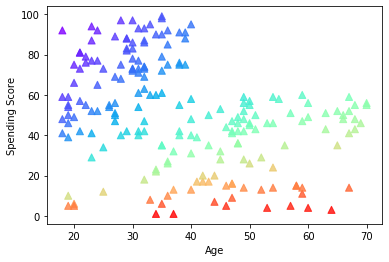

In [9]:
plt.scatter(X1,Y, c=np.arctan2(X1, Y), cmap='rainbow', s=50, alpha=0.8, marker='^')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()


Here we can see that we cannot easily make out clusters by just looking at scatter plot that is why we need clustering methods to help us with that

# K Means Clustering
To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids
It halts creating and optimizing clusters when either:
The centroids have stabilized — there is no change in their values because the clustering has been successful.
The defined number of iterations has been achieved.

In [10]:
from sklearn.cluster import KMeans
%matplotlib inline
x = data.iloc[:, [3,4]].values
mc=[]
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
kmeans.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

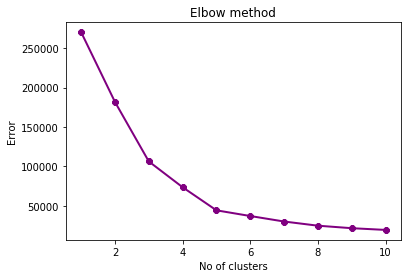

In [11]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error,linewidth=2, color="purple", marker ="8")
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The optimal K value is found to be 5 using the elbow method.

In [12]:

kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(x)
print("Inertia for 5 clusters: ",kmeans.inertia_)


Inertia for 5 clusters:  44448.45544793371
Inertia for 8 clusters:  25018.576334776335


The optimal K value is found to be 5 using the elbow method.

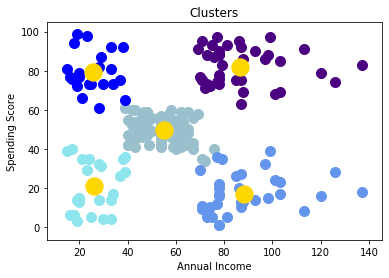

In [13]:

kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='#9AC0CD', label ='Cluster 1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='indigo', label ='Cluster 3')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='#8EE5EE', label ='Cluster 4')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='cornflowerblue', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='gold', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


Here we can see that easily 5 clusters can be made of :
1. Low income group and low spending score
2. Low income and high spending score
3. Mid income group and mid spending score
4. High income and low Spending Score
5. High income and High spending score

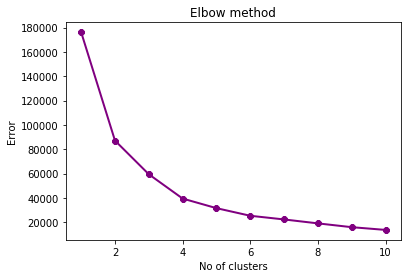

In [14]:
x = data.iloc[:, [2,3]].values
mc=[]
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
kmeans.fit(x)
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error,linewidth=2, color="purple", marker ="8")
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The optimal K value is found to be 6 using the elbow method.

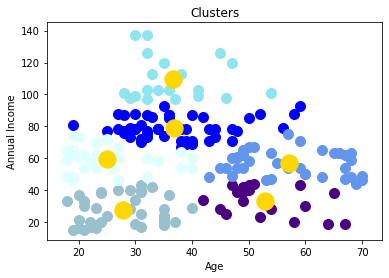

In [15]:

kmeans = KMeans(n_clusters=6, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='#9AC0CD', label ='Cluster 1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='indigo', label ='Cluster 3')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='#8EE5EE', label ='Cluster 4')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='cornflowerblue', label ='Cluster 5')
plt.scatter(x[y_kmeans==5, 0], x[y_kmeans==5, 1], s=100, c='#E0FFFF', label ='Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='gold', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()


Here we can see that easily 6 clusters can be made of :
1. Low income group till 40k dollars and low age till 40's
2. Low income group till 70k dollars and low age till 40's
3. Mid income group aroung 80k dollars and a range of age from 20's to 60's
4. Low income group till 40k dollars and high age from 40's till 70's
5. Low income group till 70k dollars and high age from 40's till 70's
6. High Income group from 100k dollars till 140k dollars and mid age group from 30's to 50's

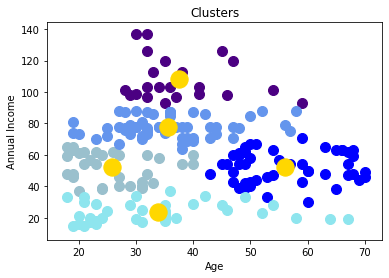

Here we can see that for 5 clusters the score 20 has a really large cluster
Hence, 6 clusters is a better choice

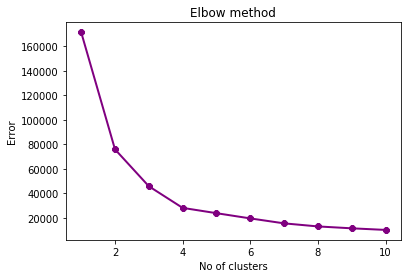

In [16]:
x = data.iloc[:, [2,4]].values
mc=[]
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
kmeans.fit(x)
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error,linewidth=2, color="purple", marker ="8")
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

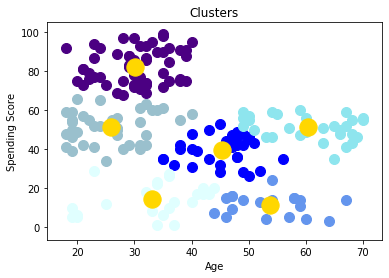

In [17]:

kmeans = KMeans(n_clusters=6, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='#9AC0CD', label ='Cluster 1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='indigo', label ='Cluster 3')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='#8EE5EE', label ='Cluster 4')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='cornflowerblue', label ='Cluster 5')
plt.scatter(x[y_kmeans==5, 0], x[y_kmeans==5, 1], s=100, c='#E0FFFF', label ='Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='gold', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()


The optimal K value is found to be 6 using the elbow method.
Here we can see that easily 6 clusters can be made of :
1. Low age group and low spending score
2. Low age group and mid spending score
3. Low age group and high spending score
4. Mid age group and mid Spending Score
5. High age group and low spending score
6. High age group and mid spending score

# Hierarchical Clustering
Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together, and (2) merge the two most similar clusters. This iterative process continues until all the clusters are merged together.


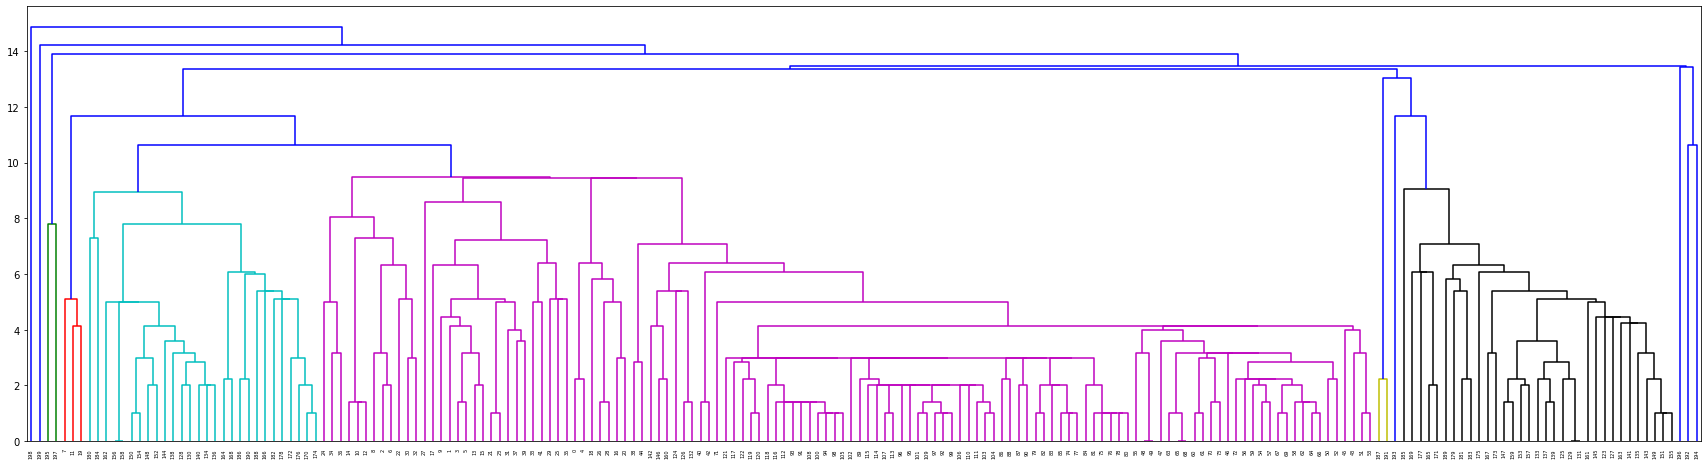

In [18]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
X = data.iloc[:, [3,4]].values
plt.figure(figsize=(30,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

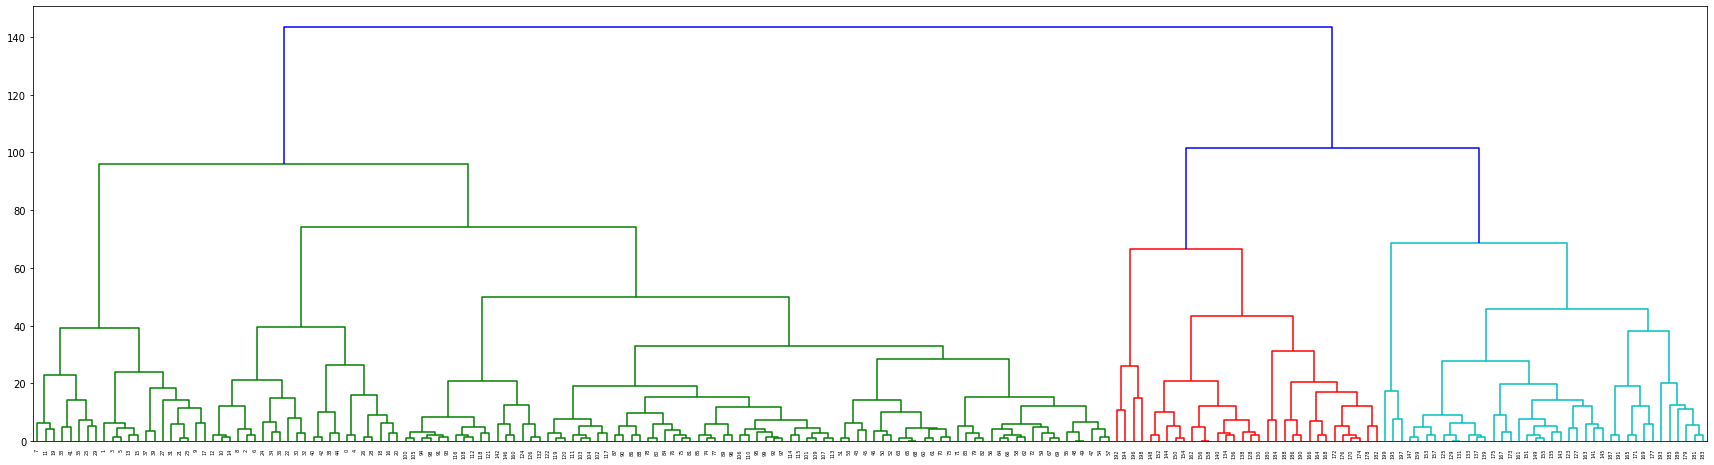

In [19]:
plt.figure(figsize=(30,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

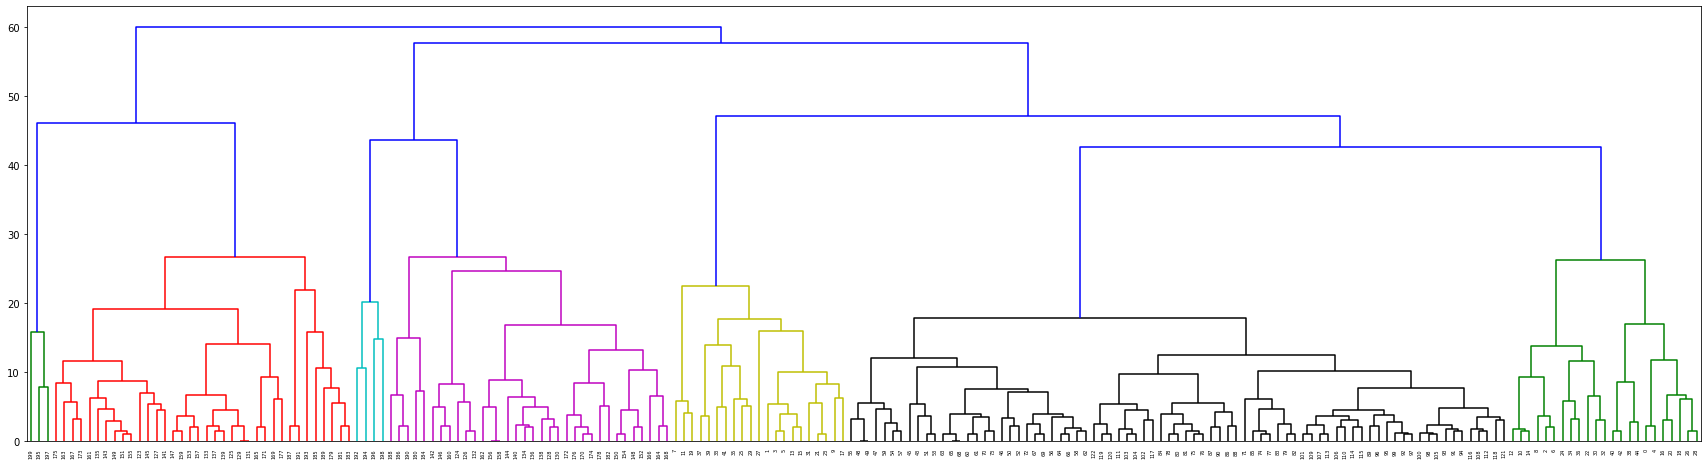

In [20]:
plt.figure(figsize=(30,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

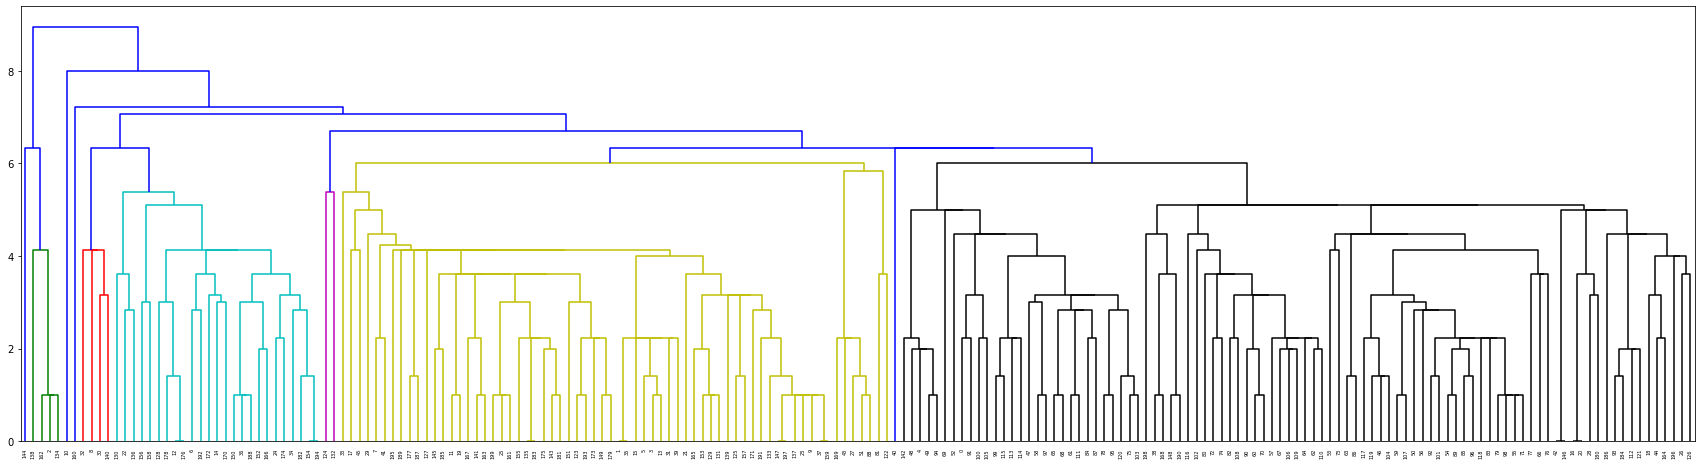

In [21]:
X = data.iloc[:, [2,4]].values
plt.figure(figsize=(30,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

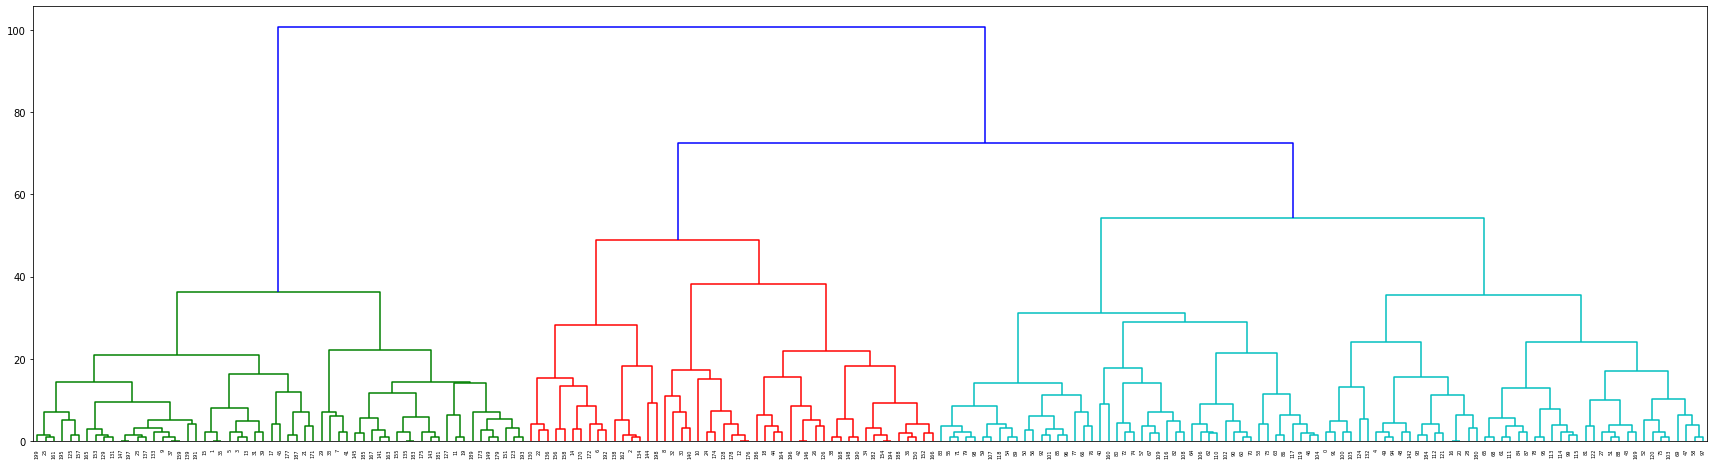

In [22]:
plt.figure(figsize=(30,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

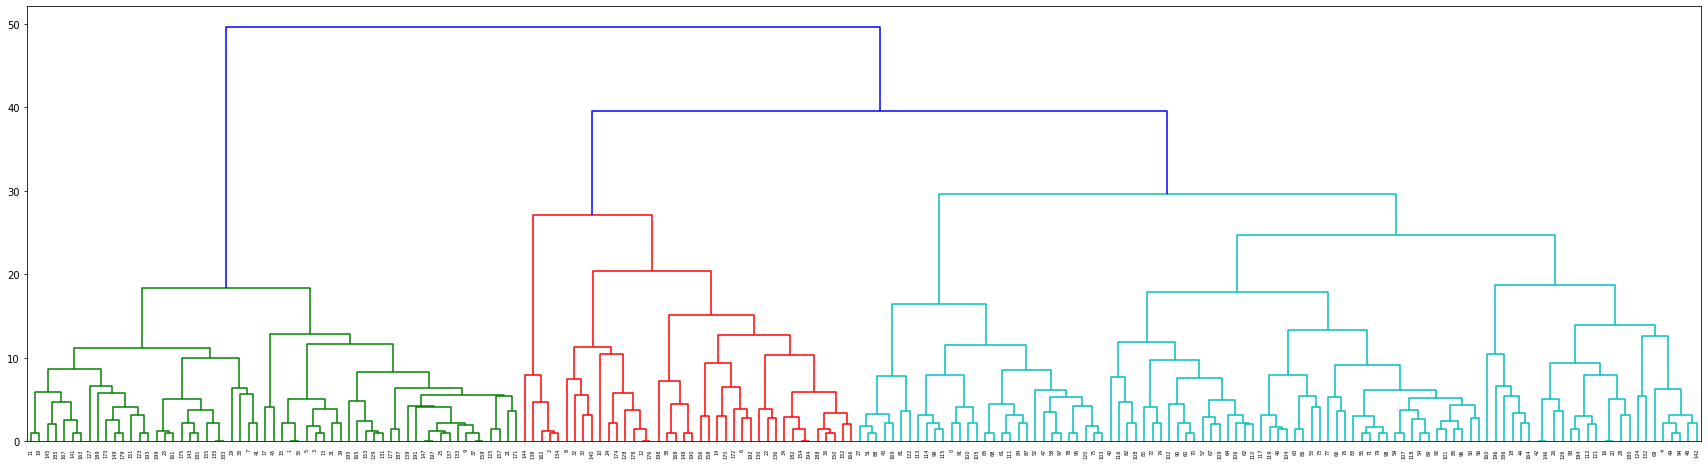

In [23]:
plt.figure(figsize=(30,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

From the above dendograms we can see that if clusters have greater distance then they have less similar points, so better clusters 

# DBSCAN 
K-Means and Hierarchical Clustering both fail in creating clusters of arbitrary shapes. They are not able to form clusters based on varying densities. That’s why we need DBSCAN clustering.

In [32]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=4,min_samples=7,metric='euclidean')
x = data.iloc[:, [2,3]].values
model=db.fit(x)
label=model.labels_
label

array([ 0,  0,  0,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1,  2,  2, -1,
       -1, -1, -1,  2, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2, -1, -1, -1,
       -1, -1,  3,  3,  3, -1,  4,  3,  3, -1,  3, -1,  3, -1,  4, -1,  4,
       -1,  4, -1,  4, -1,  4,  4,  4,  4,  4, -1,  4,  4,  4, -1, -1, -1,
        4, -1,  4,  4,  4,  4,  4, -1,  4, -1,  4, -1,  5, -1,  5,  5,  5,
        5,  5,  5,  5, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [33]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 6


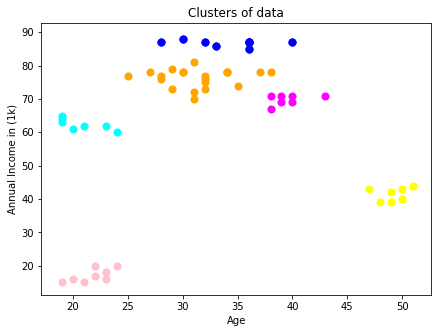

In [36]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
#plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
#plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Annual Income in (1k)')
plt.title('Clusters of data')
plt.show()

Similar to K means we can see that even DBScan is showing 6 clusters in case of annual income and age factor